In [1]:
# importation des librairies et vérification des versions

import pandas as pd
import numpy as np
import matplotlib as mtp
import matplotlib.pyplot as plt
import seaborn as sns

print(pd.__version__) # 1.1.3
print(np.__version__) # 1.19.4
print(mtp.__version__) # 3.3.2
print(sns.__version__) # 0.11.0

1.1.3
1.19.4
3.3.2
0.11.0


In [2]:
# récupération des données

scored_imputed_datas = pd.read_csv("imputed_sample.csv")

import pickle

relevant_features = pickle.load(open("pickle_relevant_features.pkl", "rb"))

# Analyse en composantes principales

In [3]:
scored_imputed_datas

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,494.0,0.00,0.0,29.41,23.53,0.00,0.00,2.3525,0.9410,16.0
1,623.0,5.20,0.9,21.00,5.20,2.80,4.90,0.5900,0.2360,-1.0
2,1556.0,5.81,0.0,65.12,4.65,7.00,13.95,0.0000,0.0000,-5.0
3,2372.0,43.33,15.0,30.00,16.67,6.70,16.67,0.9575,0.3830,19.0
4,1674.0,12.00,2.0,65.00,24.00,3.88,10.00,6.0000,2.4000,20.0
...,...,...,...,...,...,...,...,...,...,...
11301,2745.0,58.00,5.0,5.00,3.50,7.46,23.00,0.0100,0.0040,2.0
11302,761.0,16.00,1.4,6.90,5.50,2.20,1.50,1.6500,0.6600,9.0
11303,126.0,0.00,0.0,7.00,6.90,0.00,0.00,0.0100,0.0040,10.0
11304,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0254,0.0102,0.0


In [4]:
# ACP

from sklearn import decomposition, preprocessing

scaled_datas = scored_imputed_datas.copy()
scaled_datas[relevant_features] = preprocessing.StandardScaler().fit_transform(scored_imputed_datas)
scaled_datas.drop(columns=["nutrition-score-fr_100g"], inplace=True)

pca = decomposition.PCA(n_components=9)
pca.fit(scaled_datas)

print("Pourcentage de variance expliquée : ")
print(pca.explained_variance_ratio_)
#print("Composantes principales : ")
#print(pca.components_)
print("Valeurs propres : ")
print(pca.explained_variance_)

Pourcentage de variance expliquée : 
[2.89112735e-01 2.46570210e-01 1.88158161e-01 1.27545731e-01
 7.35457471e-02 4.13048944e-02 2.82492180e-02 5.51048652e-03
 2.81719497e-06]
Valeurs propres : 
[2.60224478e+00 2.21932819e+00 1.69357324e+00 1.14801312e+00
 6.61970274e-01 3.71776933e-01 2.54265452e-01 4.95987656e-02
 2.53569975e-05]


Text(0, 0.5, 'Taux de variance expliquée cumulée')

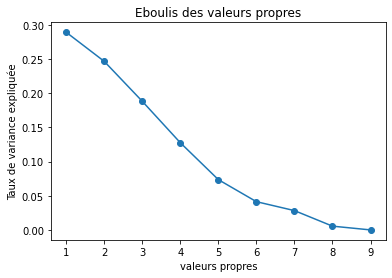

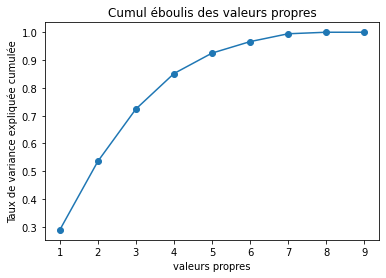

In [5]:
# visualisation des taux de variance expliquée

fig = plt.figure()
plt.title("Eboulis des valeurs propres")
plt.plot(range(1,10),pca.explained_variance_ratio_, '-o')
plt.xlabel("valeurs propres")
plt.ylabel("Taux de variance expliquée")
plt.show

fig = plt.figure()
plt.title("Cumul éboulis des valeurs propres")
plt.plot(range(1,10),pca.explained_variance_ratio_.cumsum(), '-o')
plt.xlabel("valeurs propres")
plt.ylabel("Taux de variance expliquée cumulée")

On constate que les pourcentages de variance expliquée ne sont pas très élevés sur les premières dimensions, il semble donc difficile de simplifier le modèle de cette façon. 

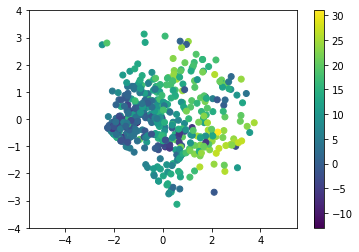

In [6]:
# visualisation de 500 observations sur les deux premières composantes

X_projected = pca.transform(scaled_datas)
sample = np.random.randint(X_projected.shape[0], size=500 )
sampled_datas = X_projected[sample]

plt.scatter(sampled_datas[:, 0], sampled_datas[:, 1],
    c=scored_imputed_datas.iloc[sample,-1])

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

On constate que les produits avec le moins bon NutriScore sont globalement plus a gauche sur le premier axe.

(-0.7, 0.7)

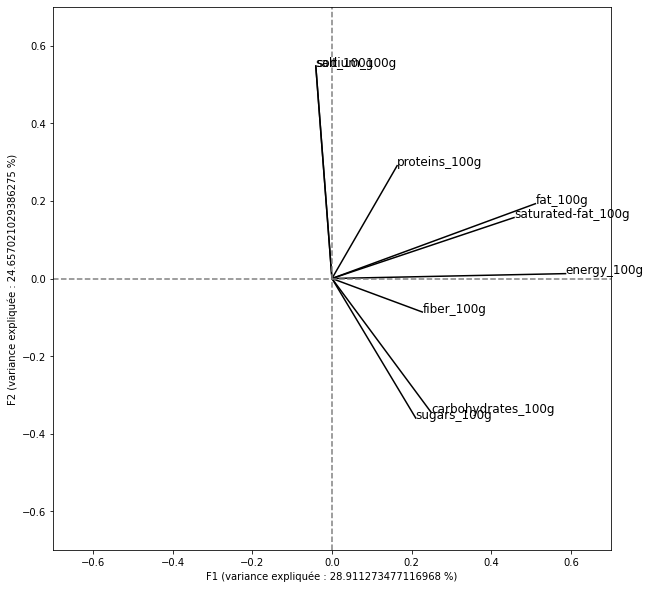

In [7]:
# projection des features sur les deux premiers axes

pcs = pca.components_

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    ax.plot([0, x], [0, y], color='k')
    ax.text(x, y, scored_imputed_datas.columns[i], fontsize='12')

ax.plot([-0.7,0.7], [0, 0], color='grey', ls='--')
ax.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

ax.set_xlabel(f"F1 (variance expliquée : {pca.explained_variance_ratio_[0]*100} %)")
ax.set_ylabel(f"F2 (variance expliquée : {pca.explained_variance_ratio_[1]*100} %)")


plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

Les corrélations suivantes semblent importantes :
* le sel et le sodium,
* les graisses saturées ou non, 
* les sucres et les hydrates de carbone.  

L'énergie et les graisses sont très corrélées positivement à la première composante. Cela rejoint la tendance du nutriscore à augmenter sur cet axe.

Le sel et le sucre sont très corrélés respectivement et négativement à la seconde composante, elle correspond donc de façon très schématique à une distinction sucré/salé.

(-0.8, 0.8)

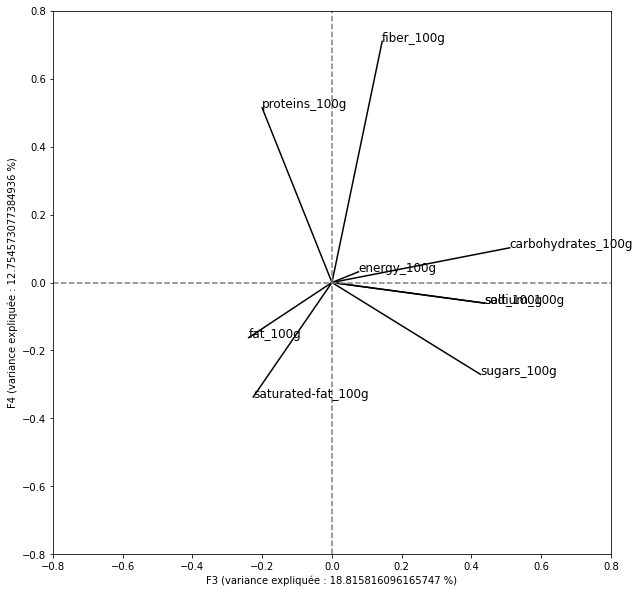

In [8]:
# projection des features sur les troisième et quatrième axes

pcs = pca.components_

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i, (x, y) in enumerate(zip(pcs[2, :], pcs[3, :])):
    ax.plot([0, x], [0, y], color='k')
    ax.text(x, y, scored_imputed_datas.columns[i], fontsize='12')

ax.plot([-0.8,0.8], [0, 0], color='grey', ls='--')
ax.plot([0, 0], [-0.8, 0.8], color='grey', ls='--')

ax.set_xlabel(f"F3 (variance expliquée : {pca.explained_variance_ratio_[2]*100} %)")
ax.set_ylabel(f"F4 (variance expliquée : {pca.explained_variance_ratio_[3]*100} %)")

plt.xlim([-0.8, 0.8])
plt.ylim([-0.8, 0.8])

Cette projection confirme la corrélation importante entre :
* sodium et sel


La corrélation entre les graisses et les graisses saturées est bien présente mais moins forte que les précédentes, celle entre le sucre et les hydrates de carbone est en revanche plus faible (changement de quadrant). 

**Conclusion :** Il y a des corrélations fortes entre sel et sodium, et un peu moins forte entre les graisses et les graisses saturées (ce qui est cohérent avec la matrice de corrélation). En dehors de cela il n'y a pas de groupes importants de variables.  
Une première façon de décrire sommairement un aliment est de parler d'une part de son taux énergétique et de son taux de graisses et d'autre part si il est plutôt salé ou sucré. Attention, le taux de variance expliquée sur les deux premiers axes n'étant que de l'ordre de 50 %, cette caractérisation reste très relative.  
On a une tendance du NutriScore a augmenter le long du premier axe principal mais cela n'est pas très marqué et d'autres facteurs interviennent donc.


# Analyse linéaire

Nous allons rechercher les variables les plus corrélées à la cible et donc les plus susceptibles de l'expliquer :

In [9]:
# on construit un dictionnaire avec les variables en clé 
# et le coefficient r de Pearson entre chaque attribut et la cible en valeur

import scipy.stats as st

dict_correlations = dict()

for name in relevant_features :
    coef = st.pearsonr(scored_imputed_datas[name], scored_imputed_datas["nutrition-score-fr_100g"])[0]
    dict_correlations[name] = coef
    
dict_correlations

{'energy_100g': 0.581566486163403,
 'fat_100g': 0.5217069933370959,
 'saturated-fat_100g': 0.6021881606784483,
 'carbohydrates_100g': 0.25373070514554474,
 'sugars_100g': 0.4401812729135519,
 'fiber_100g': -0.11359119435193778,
 'proteins_100g': 0.08917961157595859,
 'salt_100g': 0.16331574579093816,
 'sodium_100g': 0.16340075054413403,
 'nutrition-score-fr_100g': 1.0}

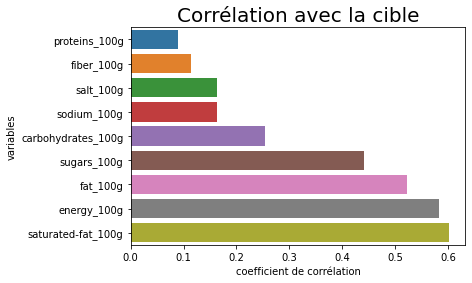

In [10]:
# visualisation des corrélations

classement = sorted(dict_correlations.items(), key=lambda x : abs(x[1]))
classement = classement[:-1]


ax = sns.barplot(y=[it[0] for it in classement], x=[abs(it[1]) for it in classement])
ax.set_title("Corrélation avec la cible", fontsize=20)
ax.set_xlabel("coefficient de corrélation")
ax.set_ylabel("variables")

plt.savefig("correlation.png",bbox_inches="tight")

In [11]:
# matrice de corrélation

scored_imputed_datas.corr()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.764578,0.564016,0.469253,0.297221,0.314188,0.250170,0.001939,0.002017,0.581566
fat_100g,0.764578,1.000000,0.729087,-0.080032,-0.028057,0.128329,0.213290,0.020387,0.020440,0.521707
saturated-fat_100g,0.564016,0.729087,1.000000,-0.053611,0.083335,-0.013619,0.172954,0.003462,0.003506,0.602188
carbohydrates_100g,0.469253,-0.080032,-0.053611,1.000000,0.655509,0.314814,-0.168637,-0.082053,-0.082009,0.253731
sugars_100g,0.297221,-0.028057,0.083335,0.655509,1.000000,0.048235,-0.277085,-0.127266,-0.127254,0.440181
fiber_100g,0.314188,0.128329,-0.013619,0.314814,0.048235,1.000000,0.167550,-0.050094,-0.050083,-0.113591
proteins_100g,0.250170,0.213290,0.172954,-0.168637,-0.277085,0.167550,1.000000,0.127740,0.127803,0.089180
salt_100g,0.001939,0.020387,0.003462,-0.082053,-0.127266,-0.050094,0.127740,1.000000,0.999975,0.163316
sodium_100g,0.002017,0.020440,0.003506,-0.082009,-0.127254,-0.050083,0.127803,0.999975,1.000000,0.163401
nutrition-score-fr_100g,0.581566,0.521707,0.602188,0.253731,0.440181,-0.113591,0.089180,0.163316,0.163401,1.000000


In [12]:
# variables retenues 

linear_relevant_features = ["saturated-fat_100g", "energy_100g", "fat_100g", "sugars_100g"]

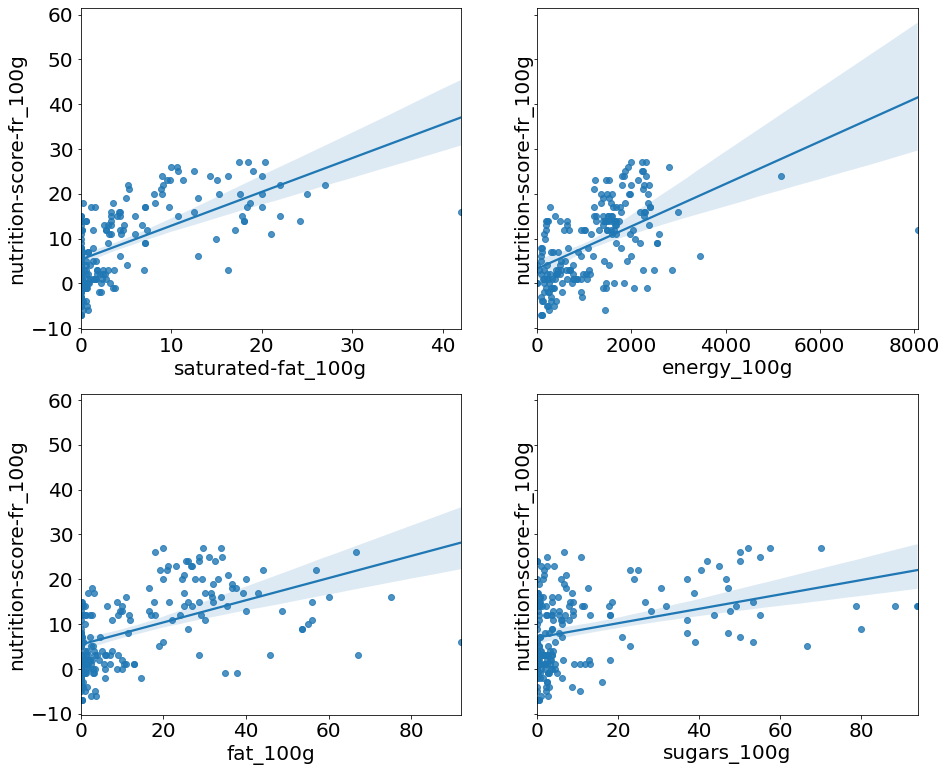

In [13]:
# visualisation des corrélations

data_size = scored_imputed_datas.shape[0]
sample = np.random.randint(data_size, size=200 )
sampled_datas = scored_imputed_datas.iloc[sample,:]

plt.rc("font", size = 20)
fig, axes = plt.subplots(2, 2, figsize=(15,13), sharey=True)
axes = axes.ravel()

for i, col in enumerate(linear_relevant_features):
    ax = axes[i]
    sns.regplot(x=col,y="nutrition-score-fr_100g",data=sampled_datas, ax=ax)



plt.savefig("nuages_correlations.png", bbox_inches="tight")
plt.show()

In [14]:
# régression linéaire de la cible à partir des variables retenues

from sklearn import model_selection, linear_model

X = scored_imputed_datas.drop(columns=["nutrition-score-fr_100g"])
y = scored_imputed_datas["nutrition-score-fr_100g"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4)

scaler = preprocessing.StandardScaler()
X_scaled_train = scaler.fit_transform(X_train[linear_relevant_features])
X_scaled_test = scaler.transform(X_test[linear_relevant_features])

reg = linear_model.LinearRegression()

reg.fit(X_scaled_train, y_train)
reg.score(X_scaled_test, y_test)

0.5499505709701091

On obtient un score assez mauvais.  
Essayons avec toutes les variables.

In [15]:
# régression linéaire en utilisant toutes les variables :

scaler = preprocessing.StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

reg = linear_model.LinearRegression()

reg.fit(X_scaled_train, y_train)
reg.score(X_scaled_test, y_test)

0.615960200986968

C'est un peu mieux, mais pas terrible.

In [16]:
# avec régularisation Ridge

params = {"alpha" : np.logspace(-3,3,7)}
score = "r2"

gs_reg_ridge = model_selection.GridSearchCV(linear_model.Ridge(),
                                           params,
                                           cv = 5,
                                           scoring = score)

gs_reg_ridge.fit(X_scaled_train, y_train)
print(gs_reg_ridge.best_params_)
gs_reg_ridge.score(X_scaled_test, y_test)

{'alpha': 1000.0}


0.6118410082347084

In [17]:
# avec régularisation Lasso

params = {"alpha" : np.logspace(-3,3,7)}
score = "r2"

gs_reg_lasso = model_selection.GridSearchCV(linear_model.Lasso(),
                                           params,
                                           cv = 5,
                                           scoring = score)

gs_reg_lasso.fit(X_scaled_train, y_train)
print(gs_reg_lasso.best_params_)
gs_reg_lasso.score(X_scaled_test, y_test)

{'alpha': 0.1}


0.6179691371424929

In [18]:
# visualisation des coefficients de la régression Lasso

ind = relevant_features.copy()
ind.remove("nutrition-score-fr_100g")
pd.Series(gs_reg_lasso.best_estimator_.coef_, index=ind)

energy_100g           2.076510
fat_100g              0.960369
saturated-fat_100g    3.029597
carbohydrates_100g    0.108057
sugars_100g           3.388551
fiber_100g           -1.792337
proteins_100g         0.561700
salt_100g             1.078216
sodium_100g           0.711832
dtype: float64

On constate que les attributs les lus pertinents ne sont pas forcément les plus corrélés.  
Ici, la régression Lasso met en avant :
* sugars_100g
* satured-fat_100g
* energy_100g
* fiber_100g (avec une influence négative)
* salt_100g
* fat_100g

# Sélection des variables par random forest

In [19]:
# random forest sur toutes les variables avec les même train set et test set

from sklearn import ensemble

rdf = ensemble.RandomForestRegressor()

rdf.fit(X_train, y_train)
rdf.score(X_test, y_test)

0.9259957419937153

On constate que le score est bien meilleur.  
Etudions l'importance des variables pour ne garder que les plus pertinentes.

In [20]:
# importance des variables

feature_importances = zip(X.columns, rdf.feature_importances_)
feature_importances = sorted(set(feature_importances), key = lambda x : x[1])
feature_importances

[('fat_100g', 0.01425040105842416),
 ('carbohydrates_100g', 0.014454510586930985),
 ('proteins_100g', 0.024437080302804087),
 ('fiber_100g', 0.03866017671714012),
 ('energy_100g', 0.04270638028730917),
 ('salt_100g', 0.05437862482957543),
 ('sodium_100g', 0.11753774651469563),
 ('sugars_100g', 0.1883654332160793),
 ('saturated-fat_100g', 0.505209646487041)]

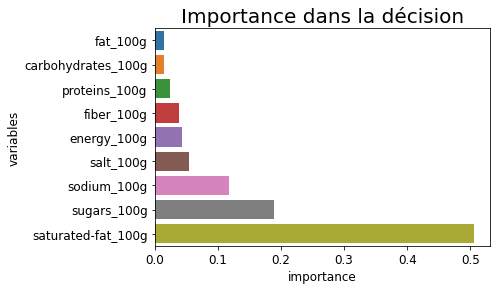

In [21]:

plt.rc("font", size = 12)
ax = sns.barplot(y=[it[0] for it in feature_importances], x=[it[1] for it in feature_importances])
ax.set_title("Importance dans la décision", fontsize=20)
ax.set_xlabel("importance")
ax.set_ylabel("variables")
plt.savefig("feature_importance.png",bbox_inches="tight")
plt.show()

Construisons différents modèles en diminuant le nombres de variables utilisées au fur et à mesure.

In [22]:
features = ["saturated-fat_100g", "sugars_100g", "sodium_100g", "salt_100g", "fiber_100g"]

rdf.fit(X_train[features], y_train)
rdf.score(X_test[features], y_test)

0.8881203976366849

In [23]:
features = ["saturated-fat_100g", "sugars_100g", "sodium_100g", "salt_100g"]

rdf.fit(X_train[features], y_train)
rdf.score(X_test[features], y_test)

0.8426676043205789

In [24]:
features = ["saturated-fat_100g", "sugars_100g", "sodium_100g"]

rdf.fit(X_train[features], y_train)
rdf.score(X_test[features], y_test)

0.8422841425667209

In [25]:
features = ["saturated-fat_100g", "sugars_100g"]

rdf.fit(X_train[features], y_train)
rdf.score(X_test[features], y_test)

0.648329062110521

On obtient un score intéressant avec seulement 3 variables (de plus l'informatino sur les fibres est souvent manquante).  
On peut remplacer le taux de sodium par le taux de sel qui est plus facilement accessible sur les emballages (ils sont très corrélés).

In [26]:
features = ["saturated-fat_100g", "sugars_100g", "salt_100g"]

rdf.fit(X_train[features], y_train)
rdf.score(X_test[features], y_test)

0.8420246524918686

### Conclusion : on peut déterminer de façon assez précise le NutriScore numérique à partir des informations sur les graisses saturées, les sucres et le sel.